# 导入必要的库
导入所需的库，包括pandas、numpy、matplotlib、scikit-learn以及gensim库用于Word2Vec实现。每个导入语句后添加注释说明该库的用途。

In [9]:
# 导入必要的库
import pandas as pd  # 数据处理和分析
import numpy as np  # 数值计算
import matplotlib.pyplot as plt  # 数据可视化
import seaborn as sns  # 数据可视化
from sklearn.cluster import KMeans  # K-means聚类算法
from sklearn.decomposition import PCA, TruncatedSVD  # 降维算法
from sklearn.metrics import silhouette_score  # 聚类评估指标
from gensim.models import Word2Vec  # Word2Vec模型用于特征提取
import re  # 正则表达式库，用于文本清洗

# 加载和预处理数据
定义数据加载和文本清洗函数。加载CSV文件，处理列名，删除空值，并对文本进行基本清洗。这里需要进行分词和去停用词处理，为Word2Vec做准备。为分词后的评论文本添加一个新列，以便后续使用。

In [10]:
# 定义数据加载和预处理函数
def load_and_preprocess(file_path):
    # 读取CSV文件
    df = pd.read_csv(file_path)
    
    # 确保数据有Comment列
    if 'Comment' not in df.columns:
        raise ValueError("CSV文件中没有'Comment'列")
    
    # 确保没有空值
    df = df.dropna(subset=['Comment'])
    
    # 文本清洗和分词
    df['clean_comment'] = df['Comment'].apply(clean_text)
    df['tokenized_comment'] = df['clean_comment'].apply(tokenize_text)
    
    return df

# 定义文本清洗函数
def clean_text(text):
    # 转换为小写
    text = str(text).lower()
    # 移除特殊字符和多余空格
    text = re.sub(r'[^a-z\s]', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    return text.strip()

# 定义分词和去停用词函数
def tokenize_text(text):
    stop_words = set(['the', 'and', 'is', 'in', 'to', 'of', 'a', 'i', 'it', 'that', 'this', 'for', 'on', 'with', 'as', 'was', 'but', 'be', 'are', 'not', 'have', 'you', 'at', 'or', 'an', 'by', 'from', 'they', 'we', 'which', 'one', 'all', 'were', 'so', 'if', 'there', 'their', 'my', 'me', 'your', 'has', 'had', 'will', 'would', 'can', 'what', 'when', 'who', 'them', 'about', 'more', 'out', 'up', 'no', 'just', 'do', 'some', 'like', 'now', 'than', 'how', 'then', 'he', 'she', 'him', 'her', 'its', 'our', 'us', 'could', 'should', 'did', 'been', 'because', 'into', 'only', 'other', 'these', 'any', 'very', 'over', 'also', 'after', 'most', 'even', 'many', 'those', 'before', 'such', 'through', 'much', 'where', 'why', 'while', 'still', 'off', 'both', 'being', 'own', 'same', 'too', 'here', 'go', 'see', 'get', 'got', 'back', 'going', 'want', 'make', 'made', 'know', 'take', 'think', 'say', 'said', 'come', 'came', 'right', 'left', 'use', 'used', 'good', 'well', 'better', 'best', 'new', 'old', 'first', 'last', 'long', 'short', 'big', 'small', 'high', 'low', 'early', 'late', 'young', 'old', 'great', 'little', 'few', 'next', 'same', 'another', 'each', 'every', 'own', 'same', 'different', 'such', 'other', 'another', 'few', 'several', 'many', 'most', 'some', 'any', 'all', 'both', 'either', 'neither', 'much', 'more', 'less', 'least', 'fewer', 'fewest', 'more', 'most', 'less', 'least', 'own', 'same', 'different', 'such', 'other', 'another', 'few', 'several', 'many', 'most', 'some', 'any', 'all', 'both', 'either', 'neither', 'much', 'more', 'less', 'least', 'fewer', 'fewest', 'more', 'most', 'less', 'least'])
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    return tokens

# 加载和预处理数据
file_path = "data/USComments.csv"  
df = load_and_preprocess(file_path)

# 显示数据基本信息
print(f"数据集共有 {len(df)} 条评论")
print(f"数据集包含的列: {df.columns.tolist()}")

# 显示处理前后的数据对比
print("\n处理前的前5条评论:")
print(df['Comment'].head())
print("\n处理后的前5条评论:")
print(df['clean_comment'].head())
print("\n分词后的前5条评论:")
print(df['tokenized_comment'].head())

数据集共有 39999 条评论
数据集包含的列: ['Unnamed: 0', 'video_id', 'Comment', 'likes', 'replies', 'clean_comment', 'tokenized_comment']

处理前的前5条评论:
0                    Logan Paul it's yo big day ‼️‼️‼️
1    I've been following you from the start of your...
2                   Say hi to Kong and maverick for me
3                                  MY FAN . attendance
4                                           trending 😉
Name: Comment, dtype: object

处理后的前5条评论:
0                           logan paul it s yo big day
1    i ve been following you from the start of your...
2                   say hi to kong and maverick for me
3                                    my fan attendance
4                                             trending
Name: clean_comment, dtype: object

分词后的前5条评论:
0                            [logan, paul, s, yo, day]
1    [ve, following, start, vine, channel, seen, vl...
2                                 [hi, kong, maverick]
3                                    [fan, attendance]
4        

# 使用Word2Vec进行特征提取
使用gensim库的Word2Vec模型训练词向量。设置参数如vector_size、window、min_count等，训练模型并保存。将每个评论转换为向量表示（通过平均词向量或其他方法），以生成文档级别的向量表示。这种表示法与TF-IDF不同，能更好地捕捉词的语义关系。

In [11]:
# 使用Word2Vec进行特征提取
# 设置Word2Vec模型参数
vector_size = 100  # 词向量的维度
window = 5  # 上下文窗口大小
min_count = 2  # 忽略出现次数少于min_count的词
workers = 4  # 训练使用的线程数

# 训练Word2Vec模型
w2v_model = Word2Vec(sentences=df['tokenized_comment'], vector_size=vector_size, window=window, min_count=min_count, workers=workers)

# 保存模型
w2v_model.save("word2vec.model")

# 将每个评论转换为向量表示（通过平均词向量）
def comment_to_vector(comment, model):
    words = [word for word in comment if word in model.wv]
    if len(words) == 0:
        return np.zeros(vector_size)
    return np.mean(model.wv[words], axis=0)

# 生成文档级别的向量表示
df['vector'] = df['tokenized_comment'].apply(lambda x: comment_to_vector(x, w2v_model))

# 将向量表示转换为矩阵形式
X = np.vstack(df['vector'].values)

# 显示向量化后的特征矩阵的形状
print(f"特征矩阵的形状: {X.shape}")

# 显示部分向量化后的特征矩阵内容
print(f"特征矩阵的部分内容:\n{X[:5]}")

特征矩阵的形状: (39999, 100)
特征矩阵的部分内容:
[[ 4.45157230e-01 -7.97552839e-02  4.70244497e-01 -6.01553142e-01
  -5.02303004e-01 -4.08193737e-01 -2.74865806e-01  3.31644088e-01
  -2.60968834e-01 -5.37652671e-01  4.77442741e-01 -2.18875498e-01
   6.62790000e-01 -2.68356085e-01  3.38224351e-01  2.53823578e-01
   8.47031623e-02 -1.14011809e-01  8.21479559e-02 -6.20353580e-01
  -2.08821729e-01 -2.26653069e-01  4.64855582e-01 -2.42158562e-01
  -3.25201094e-01  2.67114073e-01 -1.99671946e-02 -1.82614610e-01
   4.15262699e-01  2.74086952e-01 -1.89631313e-01  6.68076053e-02
   5.38655341e-01  5.29009104e-01  3.62352699e-01  1.70529425e-01
   2.05719709e-01 -3.97164635e-02 -4.08046335e-01  1.90516445e-03
  -1.60180226e-01 -1.28140803e-02 -4.41420317e-01  4.80439752e-01
  -4.28343683e-01 -4.50364023e-01 -1.74308136e-01 -5.79635613e-02
  -5.49665630e-01  7.18127117e-02 -3.26427132e-01 -3.91339250e-02
  -5.85510135e-01 -1.14651327e-03  1.78004012e-01 -5.85947037e-02
  -3.56480777e-01 -1.16410516e-01  4.016627

# 确定最佳聚类数量
使用肘部法则和轮廓系数方法确定最佳的K值。绘制不同K值下的惯性和轮廓系数曲线图，并进行分析解释。添加交互式的K值测试，允许用户尝试不同的K值范围，找到最适合的聚类数量。

In [12]:
from ipywidgets import interact,fixed

from matplotlib import rcParams

# 设置中文字体（以 SimHei 为例）
rcParams['font.sans-serif'] = ['SimHei']  # 设置字体为 SimHei（黑体）
rcParams['axes.unicode_minus'] = False   # 解决负号显示问题

# 定义寻找最佳K值的函数
def find_optimal_k(X, max_k=10):
    inertia_values = []
    silhouette_values = []
    k_values = range(2, max_k + 1)
    
    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        clusters = kmeans.fit_predict(X)
        inertia_values.append(kmeans.inertia_)
        
        # 计算轮廓系数
        if k > 1:  # 轮廓系数需要至少2个簇
            silhouette_values.append(silhouette_score(X, clusters))
    
    # 绘制肘部图
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(k_values, inertia_values, 'o-')
    plt.xlabel('聚类数量 (k)')
    plt.ylabel('惯性 (Inertia)')
    plt.title('肘部法则')
    plt.grid(True)
    
    plt.subplot(1, 2, 2)
    plt.plot(k_values, silhouette_values, 'o-')
    plt.xlabel('聚类数量 (k)')
    plt.ylabel('轮廓系数')
    plt.title('轮廓系数法')
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()
    
    # 返回最佳K值（轮廓系数最高的K值）
    best_k = k_values[np.argmax(silhouette_values)]
    return best_k, inertia_values, silhouette_values

# 交互式寻找最佳K值
@interact(max_k=(2, 20))
def interactive_find_optimal_k(max_k=10):
    best_k, inertia_values, silhouette_values = find_optimal_k(X, max_k)
    print(f"根据轮廓系数，最佳的聚类数量为: {best_k}")

interactive(children=(IntSlider(value=10, description='max_k', max=20, min=2), Output()), _dom_classes=('widge…

# 执行K-means聚类
使用确定的最佳K值执行K-means聚类。展示聚类结果的基本统计信息，如各簇的大小分布。计算并展示聚类效果的评估指标，包括轮廓系数和簇内距离。将聚类结果添加到原始数据框中以便后续分析。

轮廓系数: 0.3101
簇内距离: 1.1652

各簇的大小分布:
cluster
0    25803
1    12727
2     1469
Name: count, dtype: int64


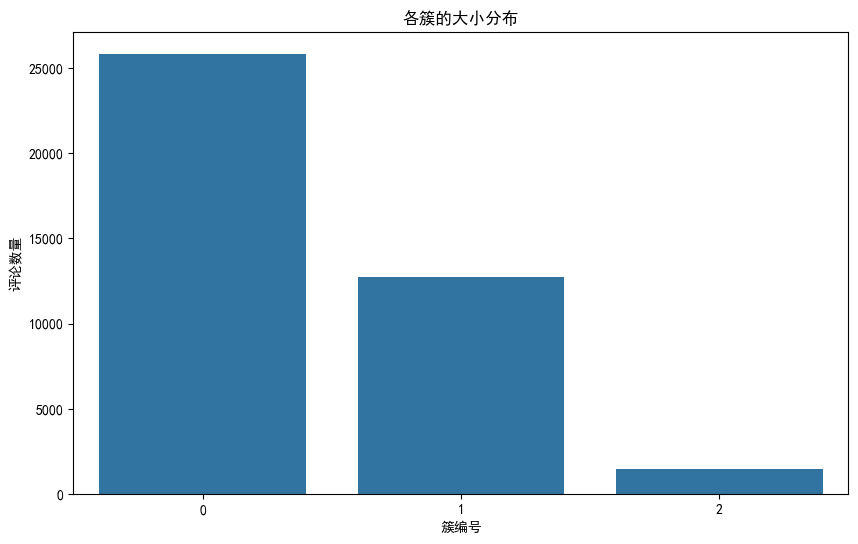

In [13]:
# 使用确定的最佳K值执行K-means聚类
best_k = 3  

# 执行K-means聚类
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X)

# 将聚类结果添加到数据框中
df['cluster'] = clusters

# 计算并展示聚类效果的评估指标
silhouette = silhouette_score(X, clusters)
print(f"轮廓系数: {silhouette:.4f}")

# 计算簇内距离
intra_distances = kmeans.transform(X).min(axis=1).mean()
print(f"簇内距离: {intra_distances:.4f}")

# 展示聚类结果的基本统计信息
cluster_counts = df['cluster'].value_counts().sort_index()
print("\n各簇的大小分布:")
print(cluster_counts)

# 可视化各簇的大小分布
plt.figure(figsize=(10, 6))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values)
plt.xlabel('簇编号')
plt.ylabel('评论数量')
plt.title('各簇的大小分布')
plt.show()

# 可视化聚类结果
使用PCA或t-SNE将高维词向量空间降维到2D进行可视化。绘制散点图展示不同簇的分布，配色方案使各簇区分明显。添加交互元素，如悬停显示评论内容。提供不同降维方法的对比，展示Word2Vec捕捉的语义关系。

In [14]:
from sklearn.manifold import TSNE
import plotly.express as px

# 可视化聚类结果
def visualize_clusters(X, clusters, df, method='PCA'):
    if method == 'PCA':
        # 使用PCA降维到2D用于可视化
        pca = PCA(n_components=2)
        X_2d = pca.fit_transform(X)
    elif method == 't-SNE':
        # 使用t-SNE降维到2D用于可视化
        tsne = TSNE(n_components=2, random_state=42)
        X_2d = tsne.fit_transform(X)
    else:
        raise ValueError("method参数必须是'PCA'或't-SNE'")
    
    # 创建可视化DataFrame
    viz_df = pd.DataFrame({
        'x': X_2d[:, 0],
        'y': X_2d[:, 1],
        'cluster': clusters,
        'comment': df['Comment']
    })
    
    # 使用Plotly绘制交互式散点图
    fig = px.scatter(viz_df, x='x', y='y', color='cluster', hover_data=['comment'], title=f'评论聚类结果 ({method})')
    fig.show()

# 交互式可视化聚类结果
@interact(method=['PCA', 't-SNE'])
def interactive_visualize_clusters(method='PCA'):
    visualize_clusters(X, clusters, df, method)

interactive(children=(Dropdown(description='method', options=('PCA', 't-SNE'), value='PCA'), Output()), _dom_c…

# 分析聚类特征
分析每个簇的中心向量，提取每个簇的代表性词语。对每个簇计算最接近中心的评论，并展示这些代表性评论内容。尝试使用Word2Vec的语义特性，如相似词查询，展示每个簇的语义主题。创建词云图显示每个簇的关键词分布。

In [15]:
from wordcloud import WordCloud
from ipywidgets import interact,fixed
# 分析每个簇的特征词
def analyze_clusters(w2v_model, kmeans, df, clusters, top_n=10):
    # 获取每个簇的中心
    centroids = kmeans.cluster_centers_
    
    # 获取特征词
    cluster_terms = {}
    for i in range(len(centroids)):
        centroid = centroids[i]
        # 计算每个词与中心的相似度
        similar_words = w2v_model.wv.similar_by_vector(centroid, topn=top_n)
        cluster_terms[i] = [word for word, _ in similar_words]
    
    # 打印每个簇的关键词
    for cluster_id, terms in cluster_terms.items():
        print(f"簇 {cluster_id}:")
        print(f"  关键词: {', '.join(terms)}")
        
        # 计算这个簇中文档数量
        cluster_df = df[df['cluster'] == cluster_id]
        print(f"  文档数量: {len(cluster_df)}")
        
        # 打印3个代表性评论
        print("  示例评论:")
        for _, row in cluster_df.sample(min(3, len(cluster_df))).iterrows():
            print(f"    - {row['Comment'][:100]}...")
        print()
    
    # 返回簇的关键词
    return cluster_terms

# 分析每个簇的特征词
cluster_terms = analyze_clusters(w2v_model, kmeans, df, clusters)

# 创建词云图显示每个簇的关键词分布
def plot_wordcloud(cluster_id, cluster_terms):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(cluster_terms[cluster_id]))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'簇 {cluster_id} 的关键词词云')
    plt.show()

# 交互式展示每个簇的关键词词云
interact(plot_wordcloud, cluster_id=(0, best_k-1), cluster_terms=fixed(cluster_terms))

簇 0:
  关键词: concept, gotta, thats, laugh, okay, yourself, ok, point, listen, felt
  文档数量: 25803
  示例评论:
    - This is like the good girl version of Amy Winehouse...
    - Fucking nigger - PewDiePie 2017...
    - I haven't seen a single video of Ingrid in aaaaaaages and omg she's so skinny now??????? 🙃...

簇 1:
  关键词: didnt, starting, especially, radio, friend, attention, allowed, alodia, reading, dang
  文档数量: 12727
  示例评论:
    - That must be a feature to stop a-holes from fumbling through all their crap while driving. It probab...
    - Kanye West is the greatest ARTIST of the 21st century...
    - she is slayin 🔥...

簇 2:
  关键词: xoxo, w, k, g, y, button, ncontact, sica, recovery, millionaire
  文档数量: 1469
  示例评论:
    - It was my b day yesterday...
    - 2:01 The lighting makes it look like the llama's eyes are glowing \n\n*S* *P* *O* *O* *P* *Y*...
    - iPhone xxxxxxxxxxx...



interactive(children=(IntSlider(value=1, description='cluster_id', max=2), Output()), _dom_classes=('widget-in…

<function __main__.plot_wordcloud(cluster_id, cluster_terms)>